# Experimentation avec une architecture CNN différente de LenNet5


## Réalisé par : Ahmed Mrabet

Dans ce notebook, nous allons essayer de voir comment le batch size et les fonctions d'optimisation peuvent influencer la performance d'un modèle de réseau de neurones convolutionnel.

In [229]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Nouveau modèle CNN

### Step 1: Dataset

In [ ]:
img_height = 32
img_width = 32
batch_size = 20

train_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/train/", image_size=(img_height, img_width), batch_size=batch_size)
test_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/test/", image_size=(img_height, img_width), batch_size=batch_size)
validation_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/validation/", image_size=(img_height, img_width), batch_size=batch_size)

Found 4142 files belonging to 3 classes.
Found 1375 files belonging to 3 classes.
Found 1385 files belonging to 3 classes.


#### Visualisation des données

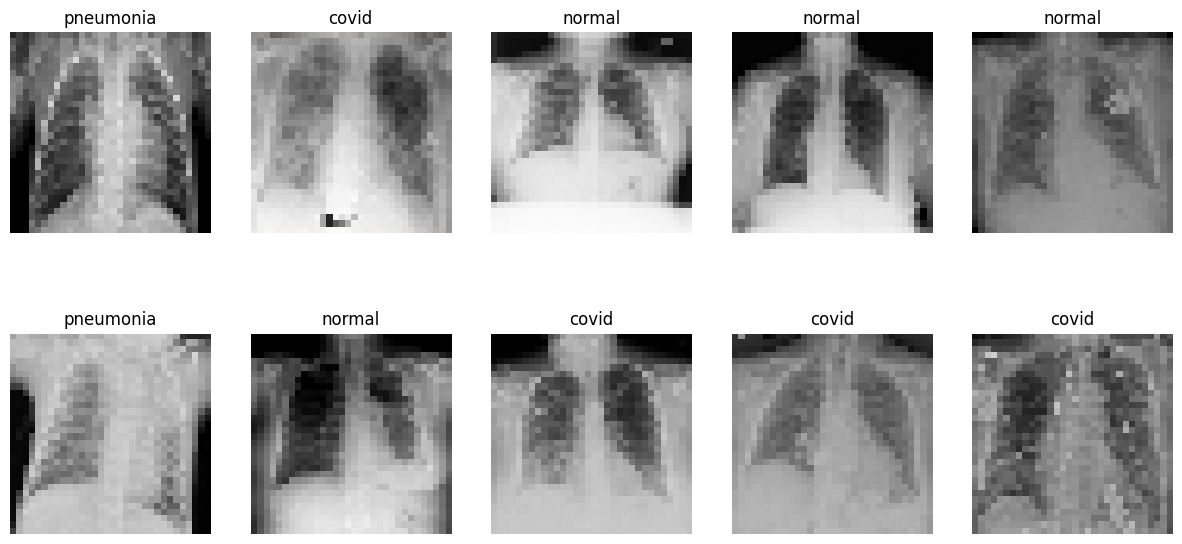

In [256]:
class_names = train_dataset.class_names
plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
    for i in range(10):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

### Step 2: Création du modèle

In [258]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (
    Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)

In [ ]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, AveragePooling2D, Flatten, Dense, Dropout

model = Sequential([
    Rescaling(1./255),
     # C1: Convolutional Layer
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(img_height, img_width, 1), padding='valid'),
    
    # S2: Subsampling (Average Pooling) Layer
    AveragePooling2D(pool_size=(2, 2), strides=2),
    
    # C3: Convolutional Layer
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    
    # S4: Subsampling (Average Pooling) Layer
    AveragePooling2D(pool_size=(2, 2), strides=2),
    
    # C5: Fully Connected Convolutional Layer
    Conv2D(120, kernel_size=(5, 5), activation='relu'),
    
    # Flatten the output
    Flatten(),
    
    # F6: Fully Connected Layer
    Dense(84, activation='relu'),
    
    # Output Layer (Gaussian Connection)
    Dense(3, activation='softmax')  # 10 classes for classification
])

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 3: Paramétrage du modèle

In [272]:
model.compile(
  optimizer=tf.optimizers.Adam(learning_rate=0.0001), 
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
  metrics=['accuracy']
)

### Step 4: Training du modèle

In [ ]:
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/5


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 259ms/step - accuracy: 0.3303 - loss: 1.9959 - val_accuracy: 0.5162 - val_loss: 1.1603
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step - accuracy: 0.5771 - loss: 1.1103 - val_accuracy: 0.6592 - val_loss: 1.0318
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - accuracy: 0.6570 - loss: 1.0144 - val_accuracy: 0.6339 - val_loss: 0.9571
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.6302 - loss: 0.9405 - val_accuracy: 0.6787 - val_loss: 0.8818
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - accuracy: 0.6694 - loss: 0.8667 - val_accuracy: 0.6859 - val_loss: 0.8165


### Step 5: Test

In [274]:
model.evaluate(test_dataset, verbose=2)

22/22 - 5s - 235ms/step - accuracy: 0.6778 - loss: 0.8189


[0.8188724517822266, 0.6778181791305542]

## Experimentations

### 1. Apprentissage

#### Batch size

In [ ]:
batch_sizes = [16, 32, 64, 128, 256, 512]
batch_histories = []

for batch_size in batch_sizes:
    train_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/train/", image_size=(img_height, img_width), batch_size=batch_size)
    test_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/test/", image_size=(img_height, img_width), batch_size=batch_size)
    validation_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/validation/", image_size=(img_height, img_width), batch_size=batch_size)

    train_dataset = train_dataset.map(convert_to_grayscale)
    validation_dataset = validation_dataset.map(convert_to_grayscale)
    test_dataset = test_dataset.map(convert_to_grayscale)

    model = Sequential([
        Rescaling(1./255),
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(img_height, img_width, 1), padding='valid'),
        AveragePooling2D(pool_size=(2, 2), strides=2),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2), strides=2),
        Conv2D(120, kernel_size=(5, 5), activation='relu'),
        Flatten(),
        Dense(84, activation='relu'),
        Dense(3, activation='softmax')  # 3 classes for classification
    ])

    model.compile(
      optimizer='adam', 
      loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
      metrics=['accuracy']
    )

    train_result = model.fit(
        train_dataset,
        validation_data=validation_dataset,
        epochs=10
    )

    test_result = model.evaluate(test_dataset, verbose=2)
    
    batch_histories.append({
        'batch_size': batch_size,
        'train_result': train_result,
        'test_result': test_result
    })


Found 4142 files belonging to 3 classes.
Found 1375 files belonging to 3 classes.
Found 1385 files belonging to 3 classes.
Epoch 1/10


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


259/259 ━━━━━━━━━━━━━━━━━━━━ 30s 87ms/step - accuracy: 0.6255 - loss: 1.2447 - val_accuracy: 0.6838 - val_loss: 0.7471
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 22s 85ms/step - accuracy: 0.8046 - loss: 0.5297 - val_accuracy: 0.8325 - val_loss: 0.5075
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.8577 - loss: 0.4324 - val_accuracy: 0.8924 - val_loss: 0.3245
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.8763 - loss: 0.3692 - val_accuracy: 0.8996 - val_loss: 0.3027
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.8922 - loss: 0.3160 - val_accuracy: 0.8881 - val_loss: 0.3234
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.9066 - loss: 0.2920 - val_accuracy: 0.9097 - val_loss: 0.2561
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.9174 - loss: 0.2579 - val_accuracy: 0.8628 - val_loss: 0.3657
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.9270 - loss: 0.2465 - val_accurac

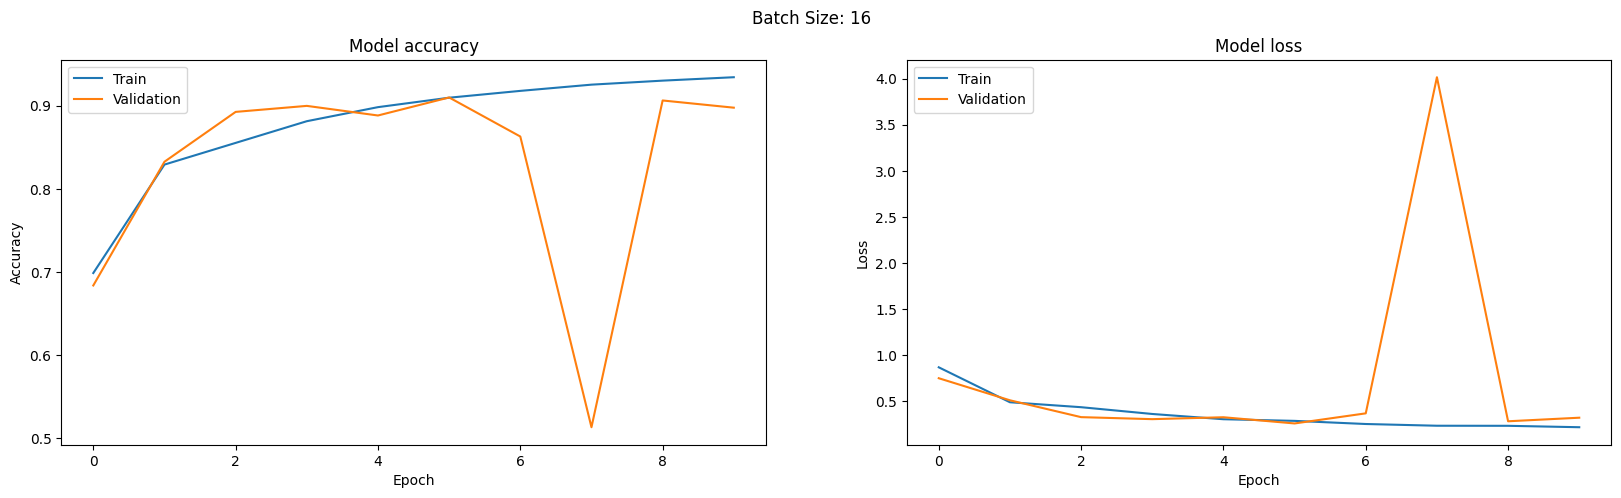

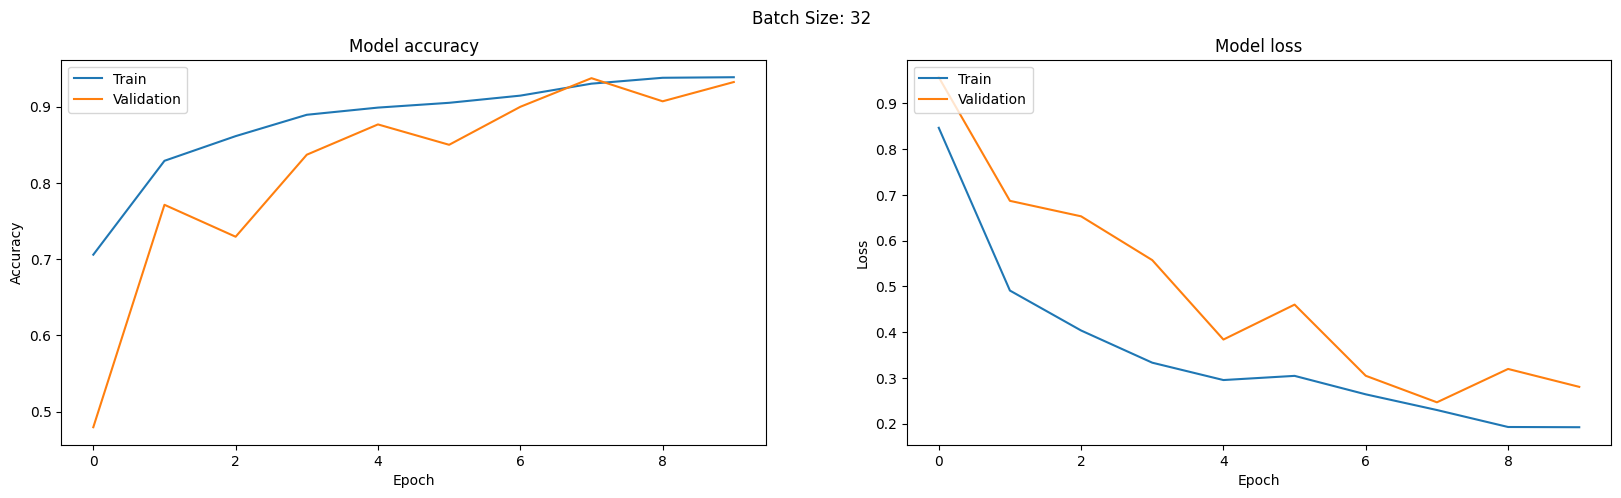

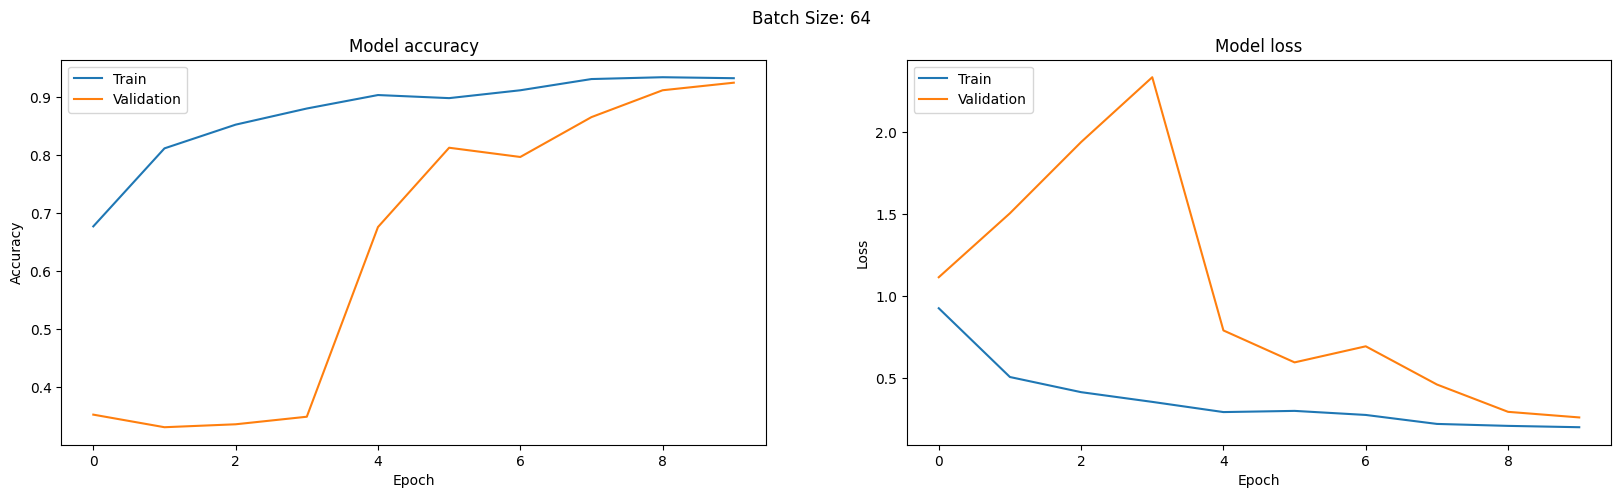

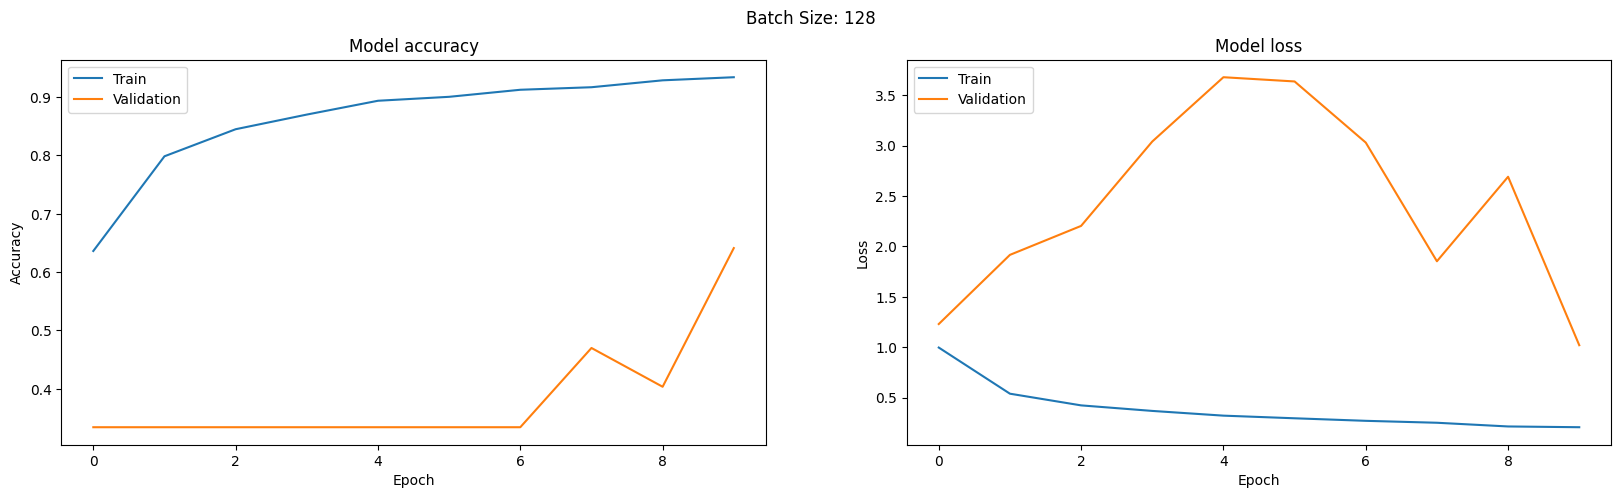

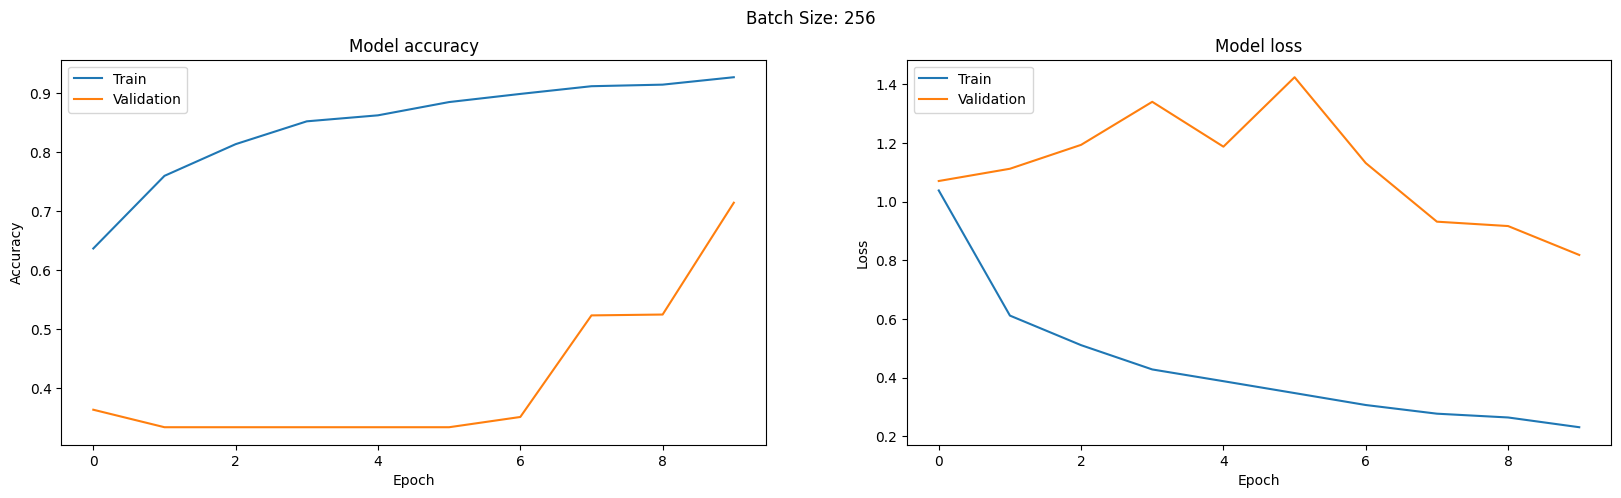

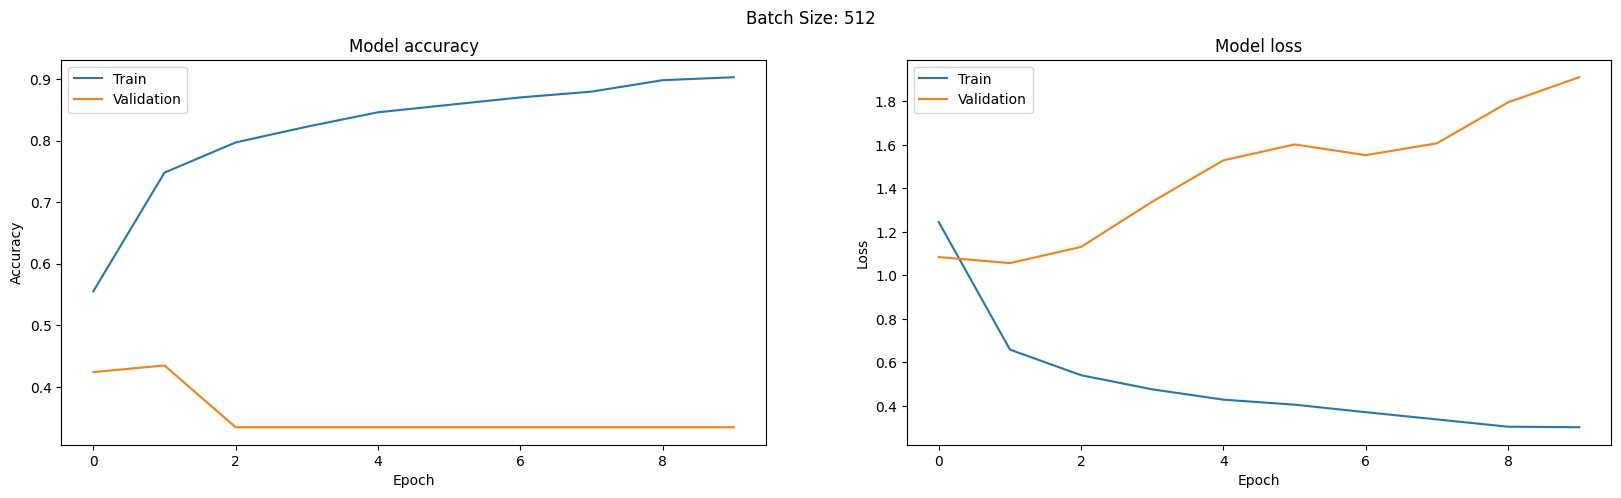

In [253]:
def plot_learning_curves(history):
    for i, result in enumerate(history):
        train_result = result['train_result']
        plt.figure(figsize=(20, 5))

        # Plot training & validation accuracy values
        plt.subplot(121)
        plt.plot(train_result.history['accuracy'])
        plt.plot(train_result.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')

        # Plot training & validation loss values
        plt.subplot(122)
        plt.plot(train_result.history['loss'])
        plt.plot(train_result.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        
        

        plt.suptitle(f"Batch Size: {result['batch_size']}")
        plt.show()
        
plot_learning_curves(batch_histories)

#### Fonctions d'optimisation

In [ ]:
# Optimizer Comparisons
optimizers = {
    "SGD": tf.keras.optimizers.SGD(learning_rate=0.01),
    "SGD with Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001)
}

history = []

for opt_name, optimizer in optimizers.items():
    model = Sequential([
        Rescaling(1./255),
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(img_height, img_width, 1), padding='valid'),
        AveragePooling2D(pool_size=(2, 2), strides=2),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2), strides=2),
        Conv2D(120, kernel_size=(5, 5), activation='relu'),
        Flatten(),
        Dense(84, activation='relu'),
        Dense(3, activation='softmax')  # 3 classes for classification
    ])

    print(f"Training with optimizer: {opt_name}")
    model.compile(optimizer=optimizer, 
                      loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
                      metrics=['accuracy'])
    train_result = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)
    test_result = model.evaluate(test_dataset, verbose=2)
    # Analyze the performance for each optimizer
    history.append({
        'train_result': train_result,
        'test_result': test_result,
    })


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with optimizer: SGD
Epoch 1/10


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


130/130 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.5828 - loss: 1.1703 - val_accuracy: 0.3343 - val_loss: 1.2617
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.7639 - loss: 0.6225 - val_accuracy: 0.5126 - val_loss: 0.9866
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.7903 - loss: 0.5502 - val_accuracy: 0.6729 - val_loss: 0.6988
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.8316 - loss: 0.4798 - val_accuracy: 0.8563 - val_loss: 0.4259
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.8504 - loss: 0.4317 - val_accuracy: 0.8765 - val_loss: 0.3551
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.8645 - loss: 0.3862 - val_accuracy: 0.8953 - val_loss: 0.3194
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.8730 - loss: 0.3675 - val_accuracy: 0.8664 - val_loss: 0.3653
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.8920 - loss: 0.3275 - val

[0.32152464985847473, 0.8843636512756348]


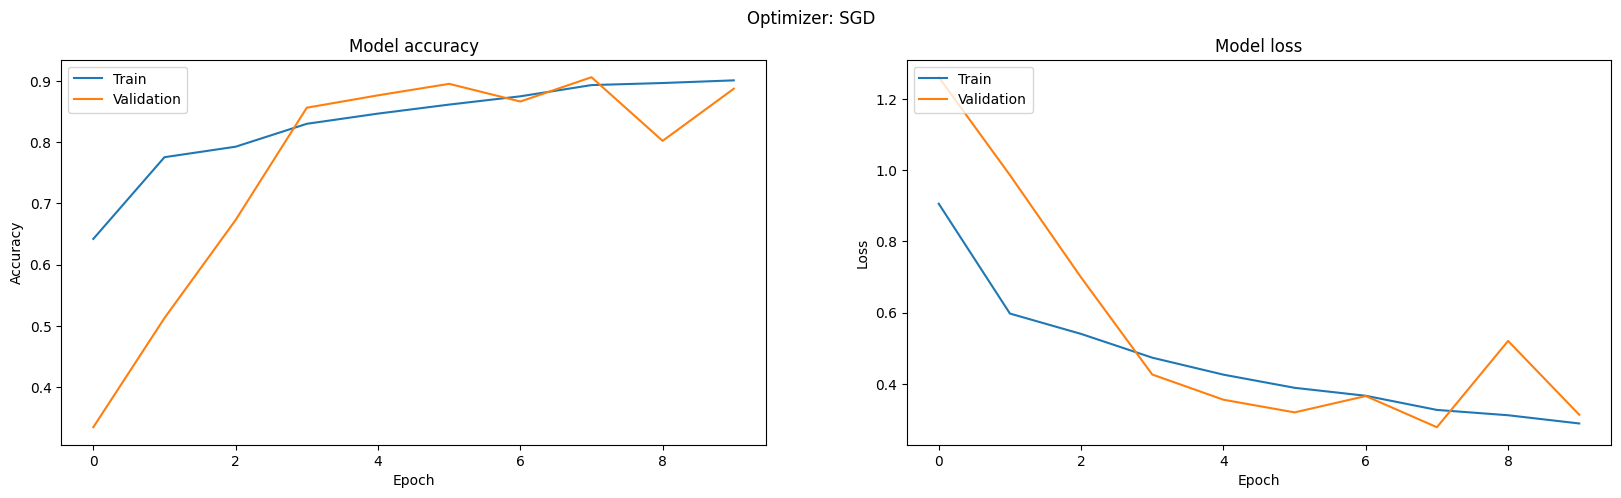

[0.4348602592945099, 0.8640000224113464]


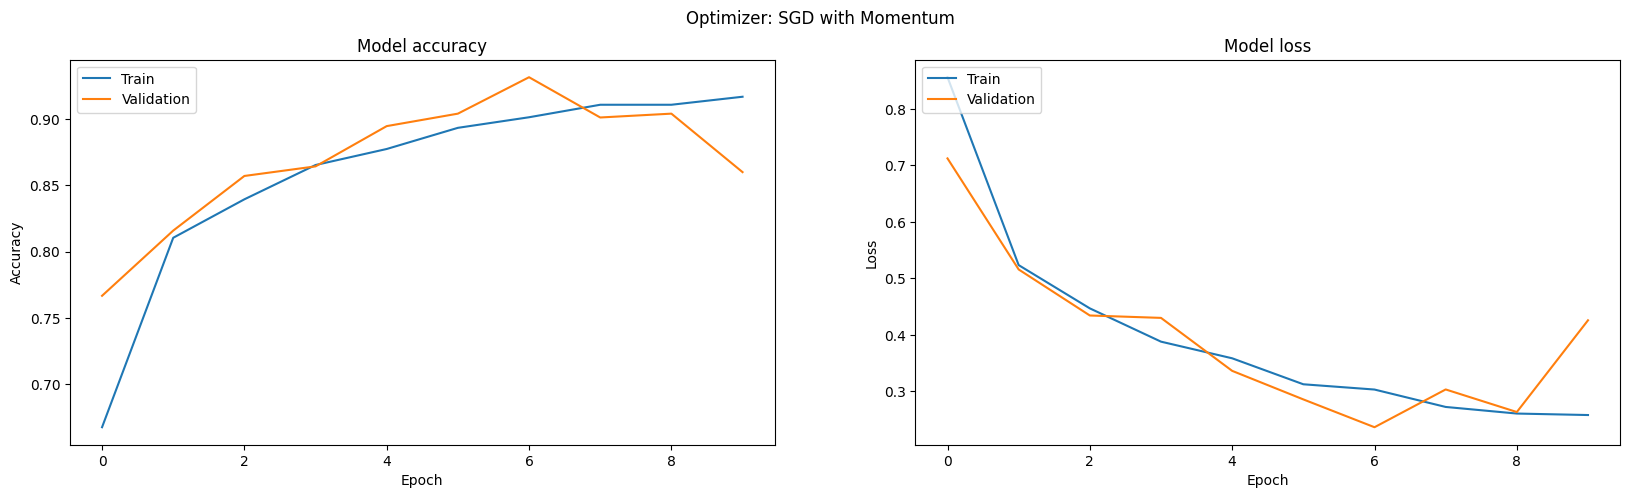

[0.5547904372215271, 0.8341818451881409]


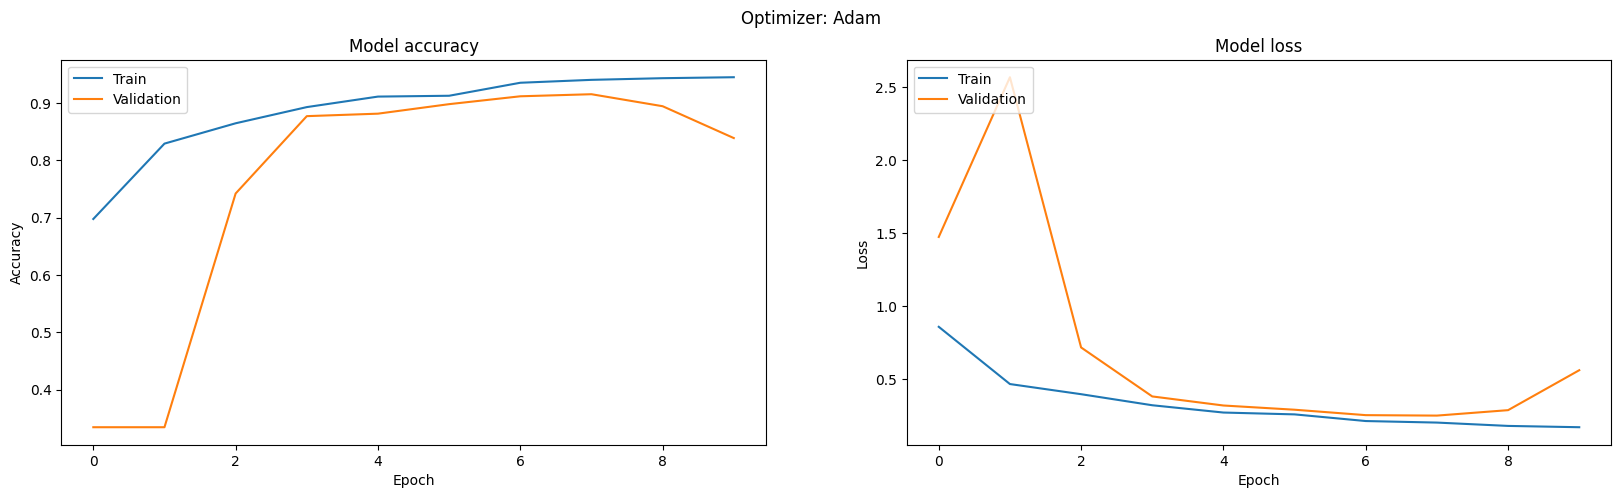

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    for i, result in enumerate(history):
        train_result = result['train_result']
        plt.figure(figsize=(20, 5))

        # Plot training & validation accuracy values
        plt.subplot(121)
        plt.plot(train_result.history['accuracy'])
        plt.plot(train_result.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')

        # Plot training & validation loss values
        plt.subplot(122)
        plt.plot(train_result.history['loss'])
        plt.plot(train_result.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        
        print(train_result.history['accuracy'])
        print(train_result.history['val_accuracy'])
        print(train_result.history['loss'])
        print(train_result.history['val_loss'])
        
        

        plt.suptitle(f"Optimizer: {list(optimizers.keys())[i]}")
        plt.show()

# Example: Plot for the last trained model
plot_learning_curves(history)

In [ ]:
# test_dataset = tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/test/", image_size=(img_height, img_width), batch_size=64)

# model.evaluate(test_dataset, verbose=2)